# Domain Proyek
Book Recomenndation System
---

Pada proyek ini, saya berfokus pada pengembangan model sistem rekomendasi buku. Di era digital saat ini, jumlah buku yang tersedia bagi pembaca sangatlah masif, baik dalam format fisik maupun digital. Masalah dalam memilih buku yang tepat menjadi isu krusial bagi para pembaca, karena pemilihan yang tidak sesuai dengan selera dan minat dapat berdampak pada penurunan minat baca, serta pemborosan waktu dan biaya. Memahami dan merekomendasikan buku yang relevan menjadi sangat penting untuk membantu pembaca menemukan bacaan yang memuaskan dan memperkaya pengalaman literasi mereka. Dengan mengidentifikasi buku yang paling cocok sejak dini, pembaca dapat memaksimalkan waktu luang mereka dan menumbuhkan kecintaan yang lebih dalam terhadap dunia literasi.

Penyelesaian masalah ini dilakukan melalui pendekatan model machine learning. Dengan menganalisis data metadata buku (seperti genre, penulis, dan deskripsi) serta data rating, model machine learning dapat mempelajari pola-pola yang mengindikasikan kecocokan suatu buku bagi pembaca. Model ini akan memberikan kemampuan untuk:
- Rekomendasi Tepat Sasaran: Memberikan rekomendasi buku yang paling sesuai berdasarkan preferensi dan riwayat baca pengguna.
- Peningkatan Pengalaman Membaca: Membantu pembaca menemukan buku yang memiliki potensi untuk memberikan kepuasan dan keterlibatan emosional tertinggi.
- Efisiensi Waktu dan Biaya: Meminimalkan risiko pemborosan waktu dan uang pada buku yang tidak sesuai selera, sehingga pembaca dapat memaksimalkan sumber dayanya untuk bacaan yang lebih berharga.

Riset menunjukkan bahwa sistem machine learning yang diusulkan dengan memanfaatkan model rekomendasi dapat dengan mudah membantu pembaca atau pengguna yang memiliki hobi membaca dalam menemukan buku yang sesuai dengan minatnya, membantu perusahaan retail buku dalam meningkatkan revenue, dan juga membantu proses administasi perpustakaan dengan lebih cepat menghadirkan rekomendasi yang sesuai dengan minat penggunanya.

Referensi :

, K., Dr, S., & Scholar, K. (2023). Study on Book Recommendation System. 2023 Advanced Computing and Communication Technologies for High Performance Applications (ACCTHPA), 1-8. https://doi.org/10.1109/ACCTHPA57160.2023.10083372.

[(Sumber Referensi)](https://doi.org/10.1109/ACCTHPA57160.2023.10083372.)


## Business Understanding
---

Pada bagian ini, saya akan menjelaskan proses klarifikasi masalah, termasuk
pernyataan masalah, tujuan, dan solusi yang diusulkan.

## Problem Statement
---

1. Kesulitan dalam Penemuan Buku yang Relevan: Di tengah melimpahnya pilihan buku, pembaca sering kali menghadapi kesulitan untuk menemukan judul yang benar-benar sesuai dengan minat mereka melalui metode pencarian konvensional yang tidak dipersonalisasi.
2. Tantangan dalam Memenuhi Selera yang Subjektif: Preferensi baca setiap individu sangat unik dan berbeda-beda. Rekomendasi umum atau daftar bestseller seringkali gagal memenuhi selera personal ini, sehingga pengalaman membaca menjadi kurang memuaskan.
3. Risiko Pemborosan Waktu dan Penurunan Minat Baca: Kesalahan dalam memilih buku tidak hanya membuang waktu dan biaya, tetapi juga dapat menyebabkan kekecewaan yang berujung pada menurunnya motivasi dan minat seseorang untuk melanjutkan kebiasaan membaca.

## Goals
---

Berdasarkan permasalahan tersebut, proyek ini bertujuan untuk membangun sistem rekomendasi buku dengan dua pendekatan model (Content-Based dan Rating-Based) untuk mencapai tujuan-tujuan berikut:

1. Mempermudah Pengguna dalam Menemukan Buku yang Relevan: Mengembangkan model yang dapat menyaring jutaan pilihan buku dan menyajikan daftar yang paling relevan secara efisien, sehingga membantu pengguna menemukan buku baru yang sesuai.
2. Meningkatkan Personalisasi dan Kepuasan Membaca: Menyediakan rekomendasi yang secara spesifik ditargetkan untuk selera unik setiap pembaca, dengan tujuan meningkatkan kepuasan dan keterlibatan emosional mereka terhadap buku yang dibaca.
3. Mengoptimalkan Investasi Waktu Pembaca dan Mendorong Minat Baca: Mengurangi kemungkinan pengguna menghabiskan waktu pada buku yang tidak tepat, sehingga menjaga agar minat baca mereka tetap tinggi dan berkelanjutan.

## Solution Statements
---

1. Rekomendasi Tepat Sasaran: Memberikan rekomendasi buku yang paling relevan dan sesuai dengan preferensi unik setiap pembaca, sehingga mempermudah proses penemuan.
2. Peningkatan Pengalaman Membaca: Membantu pembaca menemukan buku yang memiliki potensi tertinggi untuk memberikan kepuasan dan keterlibatan emosional, sesuai dengan selera subjektif mereka.
3. Optimalisasi Waktu dan Minat: Meminimalkan risiko pemborosan waktu pada buku yang tidak cocok dan menjaga agar minat baca tetap tinggi dengan menyajikan pilihan yang lebih memuaskan.

# Data Loading
---

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import warnings
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
warnings.filterwarnings('ignore')

In [4]:
# Memuat dataset
df = pd.read_csv("https://raw.githubusercontent.com/Marsello-or/Submission2_MachineLearningTerapan/refs/heads/main/data.csv")

In [5]:
df.head(5)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


---
Data sudah berhasil di load dan menunjukkan bahwa semua featurenya secara lengkap telah terupload dalam dataframe df

# Data Understanding
---

## Deksripsi Umum Data
---

Dataset "data.csv" berisi data karakteristik item dari masing-masing buku yang terdapat di dataset, beberapa karakteristik item dari dataset adalah nomor ISBN, judul, subjudul, penulis, kategori, thumbnail, deskripsi, tahun publish, rata-rata rating, banyak halaman, dan juga banyaknya rating. Dataset bersumber dari platform Kaggle yang dapat diakses pada link berikut :

[(Sumber Dataset)](https://www.kaggle.com/datasets/abdallahwagih/books-dataset).

In [6]:
df.shape

(6810, 12)

---
Terdapat 6810 data buku yang ada pada dataset ini yang masing-masing terdiri dari 12 data fitur karakteristik di dataframe.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


---
Output di atas menunjukkan bahwa dataset memiliki 6810 data profil tanaman dan  12 kolom fitur masing-masing.
- Terdapat 4 data float64.
- Terdapat 7 data object
- Terdapat 1 data int64

In [8]:
df.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6804.000000,6767.000000,6767.000000,6.767000e+03
mean,9.780677e+12,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,2005.000000,4.130000,420.000000,5.992500e+03
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06


---
Dilakukan identifikasi karakeristik secara statistik dengan menggunakan fungsi `describe`.
- `count` adalah jumlah sampel pada dataset yang digunakan
- `mean` adalah nilai rata-rata
- `std` adalah standar deviasi
- `min` adalah nilai minimum yang ada pada masing-masing kolom data
- `25%` menunjukkan kuartil pertama
- `50%` menunjukkan kuartil kedua
- `75%` menunjukkan kuartil ketiga
- `Max` adalah nilai maksimum pada kolom

* nomor ISBN13 menunjukkan rentang data nomor identifier dari masing-masing buku yang ada.
* sementara pada fitur published_year terlihat bahwa rentang tahun buku di publish dari tahun 1853 sampai 2019.
* average_rating menunjukkan rating paling kecil pada nilai 0 dan rating paling besar pada nilai 5.
* pada kolom fitur num_pages menunjukkan bahwa jumlah halaman paling sedikit yang dimiliki oleh buku adalah 0 halaman dan halaman paling banyak sebesar 3342 halaman.
* sementara pada rating count menunjukkan banyaknya orang yang melakukan rating pda buku tersebut dengan nilai paling kecil sebesar 0 dan nlai paling besar senilai 5.62x10^6

## Pengecekan kondisi data
---

In [9]:
print("Total data terduplikasi : ", df.duplicated().sum())

Total data terduplikasi :  0


In [10]:
df.isnull().sum()

,0
isbn13,0
isbn10,0
title,0
subtitle,4429
authors,72
categories,99
thumbnail,329
description,262
published_year,6
average_rating,43


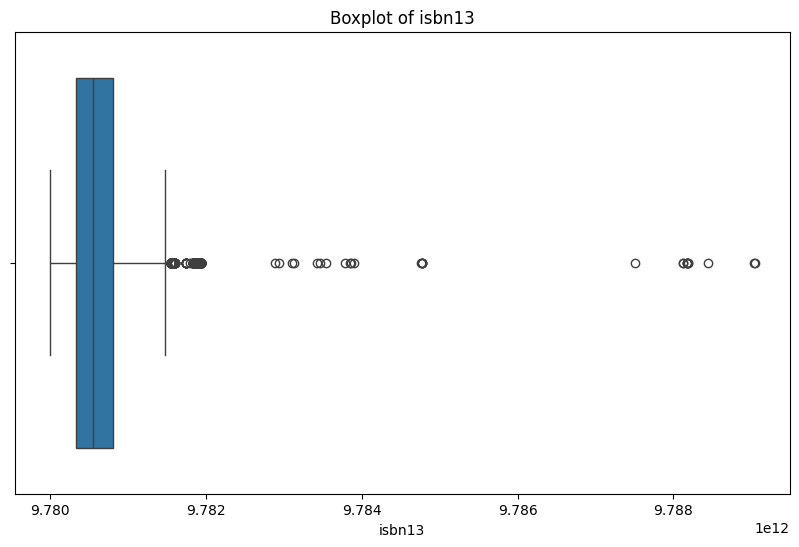

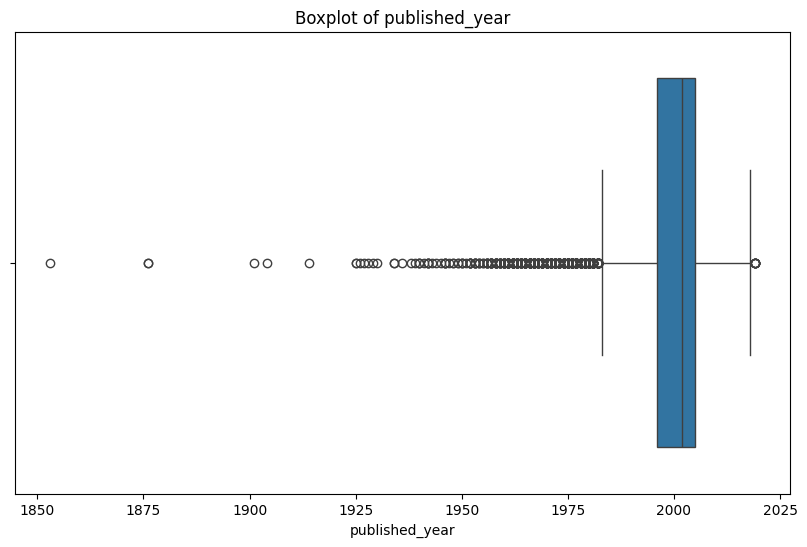

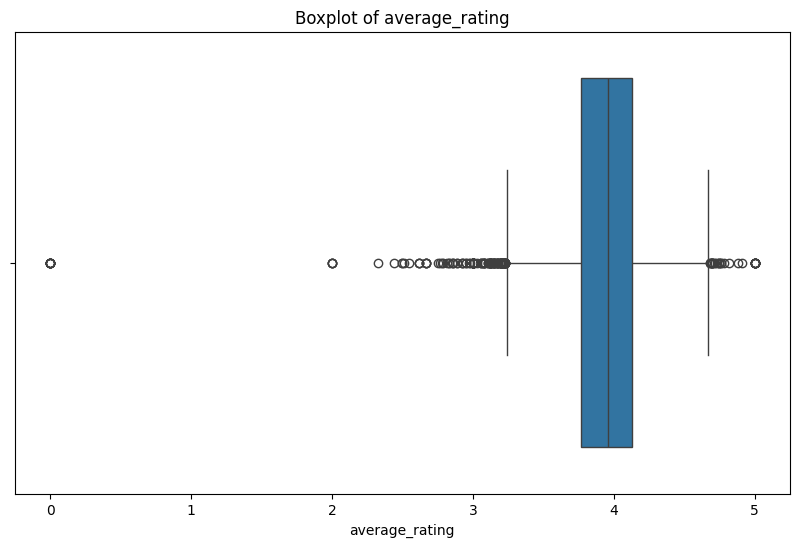

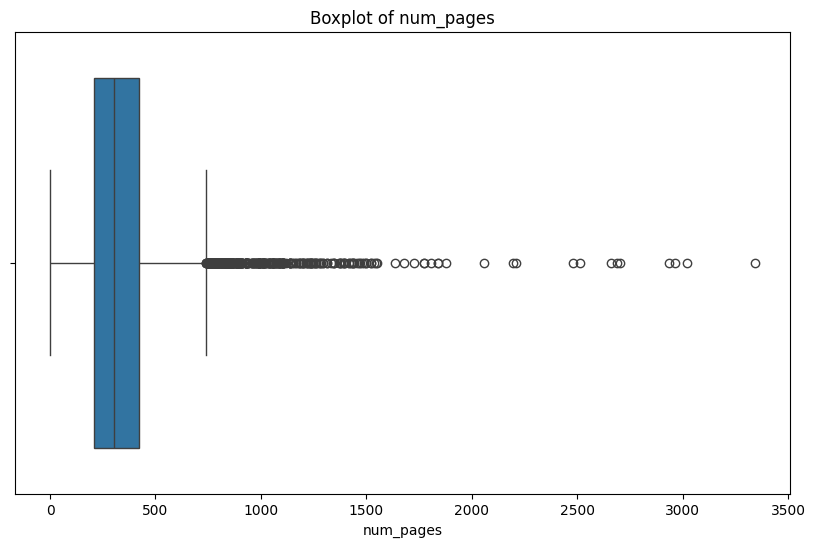

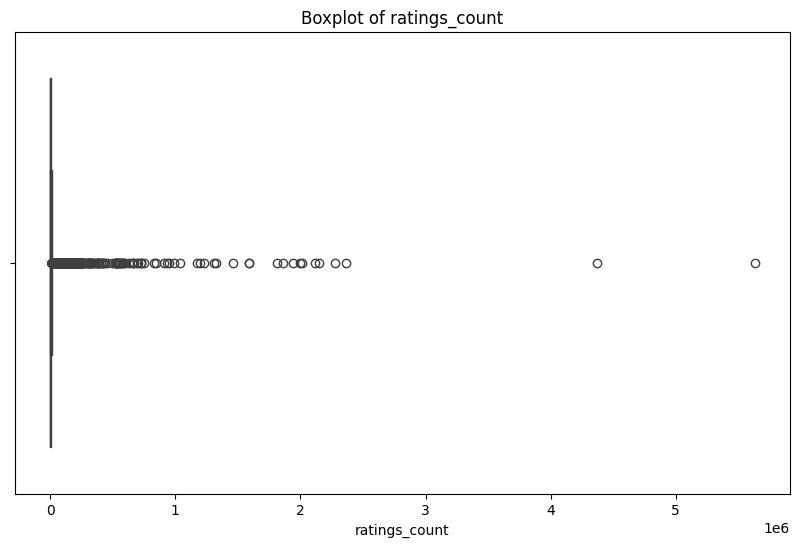

In [13]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

---
Berdasarkan analisis data understanding terlihat bahwa data yang digunakan masih memerlukan proses data cleaning karena adanya missing data pada beberapa fitur dan juga adanya outlier pada data masing-masing buku.

# Exploratory Data Analysis
___
Proses analisis data yang ada di dalam dataset, proses eksplorasi dilakukan untuk dapat melihat persebaran dan karakteristik data yang akan digunakan untuk dasar pembuatan model.

## Handling Missing and Duplicated Value
---

In [14]:
print("Total data terduplikasi : ", df.duplicated().sum())

Total data terduplikasi :  0


In [16]:
print("Jumlah missing value SEBELUM penanganan:")
print(df.isnull().sum())
print("-" * 30)

Jumlah missing value SEBELUM penanganan:
isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64
------------------------------


In [17]:
# --- 1. Imputasi Fitur Teks dengan String Kosong ---
kolom_teks = ['subtitle', 'authors', 'categories', 'thumbnail', 'description']
for kolom in kolom_teks:
    df[kolom] = df[kolom].fillna('')
print("Melakukan imputasi pada kolom teks...")
print("-" * 30)

Melakukan imputasi pada kolom teks...
------------------------------


In [18]:
# --- 2. Hapus Baris dengan Missing Value pada Fitur Numerik Kunci ---
kolom_numerik_kunci = ['published_year', 'average_rating', 'num_pages', 'ratings_count']
df.dropna(subset=kolom_numerik_kunci, inplace=True)
print("Menghapus baris dengan missing value pada kolom numerik kunci...")
print("-" * 30)

Menghapus baris dengan missing value pada kolom numerik kunci...
------------------------------


In [19]:
# --- Verifikasi Hasil ---
print("Jumlah missing value SETELAH penanganan:")
print(df.isnull().sum())
print("-" * 30)
print(f"Jumlah baris data setelah dibersihkan: {len(df)}")

Jumlah missing value SETELAH penanganan:
isbn13            0
isbn10            0
title             0
subtitle          0
authors           0
categories        0
thumbnail         0
description       0
published_year    0
average_rating    0
num_pages         0
ratings_count     0
dtype: int64
------------------------------
Jumlah baris data setelah dibersihkan: 6762


---
1. Fitur Teks: subtitle, authors, categories, description, thumbnail
Rekomendasi: Lakukan imputasi (pengisian nilai yang hilang) dengan string kosong ('').
Alasan:
  - subtitle: Sebagian besar buku memang tidak memiliki subtitle. Nilai NaN (kosong) di sini bukanlah data yang rusak, melainkan informasi bahwa subtitle tidak ada. Menghapus baris ini akan menghilangkan lebih dari separuh data Anda. Mengisinya dengan string kosong adalah representasi yang paling akurat.
  - authors, categories, description: Fitur-fitur ini sangat penting untuk model Content-Based Filtering. Menghapus baris hanya karena salah satu dari data ini kosong akan menghilangkan informasi berharga dari kolom lain. Mengisinya dengan string kosong memastikan fitur ini tetap dapat digunakan untuk analisis teks tanpa menimbulkan error.
  - thumbnail: Ini adalah URL gambar. Kehadirannya tidak krusial untuk logika model rekomendasi kita. Menghapusnya tidak perlu, cukup diisi string kosong agar tipe datanya konsisten.
2. Fitur Numerik: average_rating, ratings_count, num_pages, published_year
Rekomendasi: Hapus baris yang memiliki nilai kosong pada fitur-fitur ini.
Alasan:
  - Jumlahnya Sangat Sedikit: Persentase data yang hilang untuk fitur-fitur ini sangat kecil (kurang dari 1%). Menghapus baris-baris ini tidak akan mengurangi ukuran dataset secara signifikan.
  - Menjaga Kualitas Data: average_rating dan ratings_count adalah inti dari model rekomendasi berbasis rating. Melakukan imputasi (misalnya dengan nilai rata-rata atau median) dapat memasukkan bias dan menghasilkan rekomendasi yang tidak akurat. Menghapus baris ini adalah cara terbersih untuk memastikan kualitas data pada model kedua kita.
  - Integritas Data: Sebuah buku tanpa informasi rating, jumlah halaman, atau tahun terbit memiliki data yang kurang lengkap. Menghapusnya adalah pilihan yang paling aman untuk menjaga integritas analisis.

## Boxplot Visualization
---

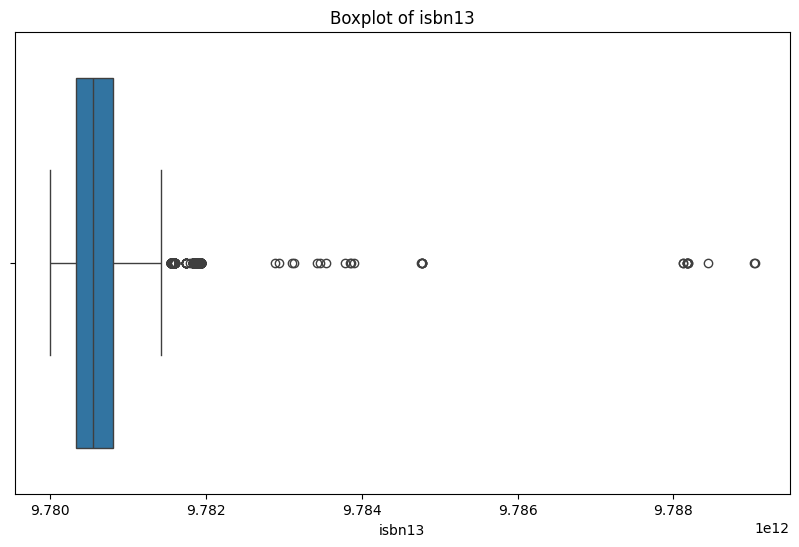

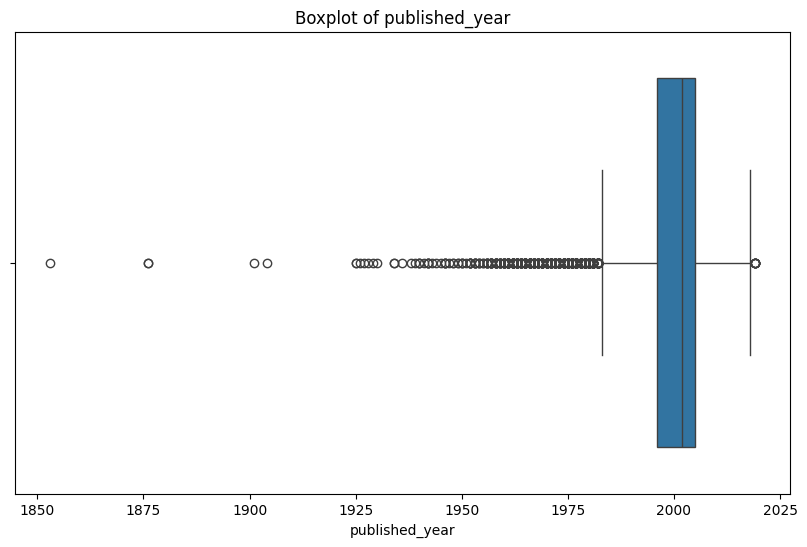

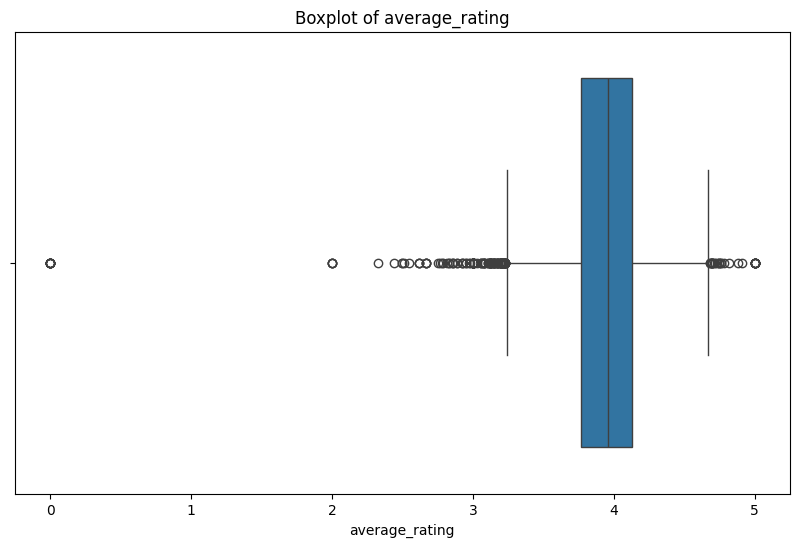

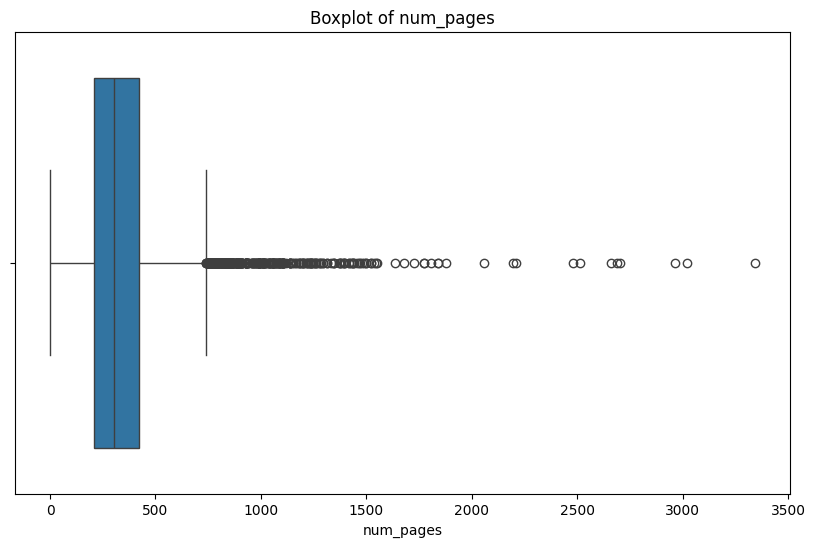

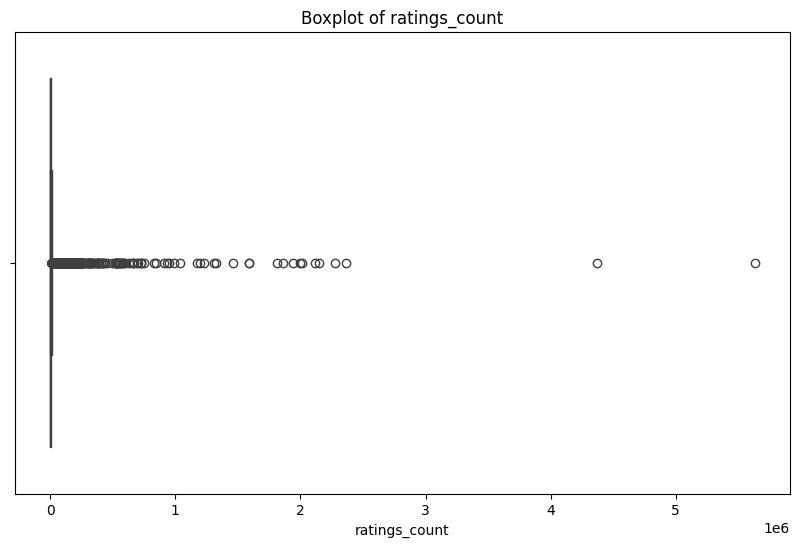

In [20]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

---
Dari analisis boxplot di atas terlihat bahwa terdapat banyak nilai outlier yang terdeteksi pada masing-masing fitur yang digunakan dalam dataset, outlier-outlier ini menunjukkan data yang secara ekstrem berada di bawah atau atas batas yang telah ditentukan. Namun, dalam handlingnya bisa jadi terdapat beberapa fitur yang tidak harus dihilangkan nilai outliernya karena akan mengganggu kebersihan dan keakuratan model yang akan dibuat.

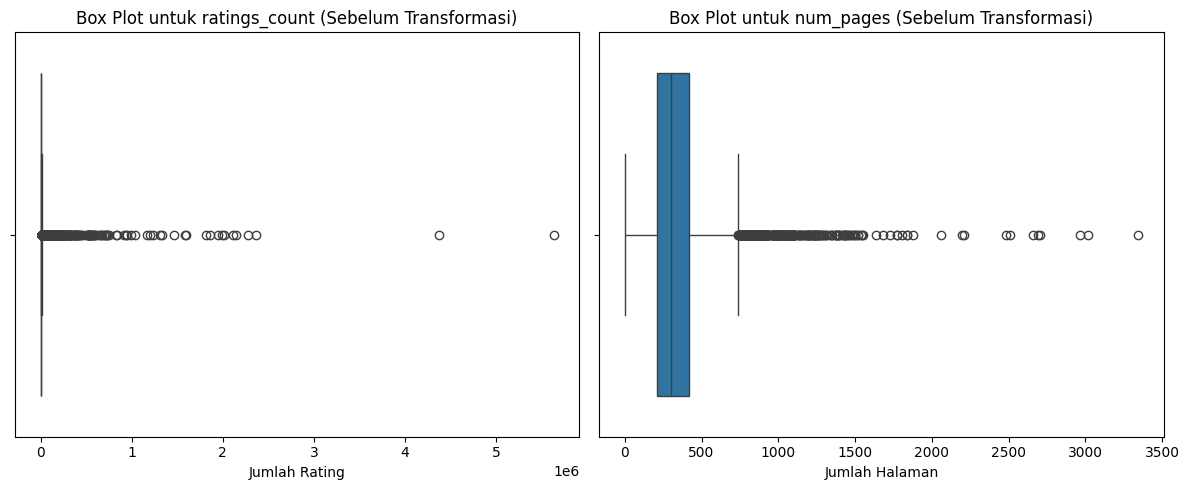

In [22]:
# --- 1. Visualisasi untuk Deteksi Outlier ---
# Kita fokus pada 'ratings_count' dan 'num_pages' yang paling mungkin punya outlier signifikan

plt.figure(figsize=(12, 5))

# Box plot untuk ratings_count
plt.subplot(1, 2, 1)
sns.boxplot(x=df['ratings_count'])
plt.title('Box Plot untuk ratings_count (Sebelum Transformasi)')
plt.xlabel('Jumlah Rating')

# Box plot untuk num_pages
plt.subplot(1, 2, 2)
sns.boxplot(x=df['num_pages'])
plt.title('Box Plot untuk num_pages (Sebelum Transformasi)')
plt.xlabel('Jumlah Halaman')

plt.tight_layout()
plt.show()

In [25]:
# --- 2. Penanganan Outlier dengan Log Transformation ---
# Kita menggunakan log1p yang setara dengan log(x+1) untuk menangani nilai 0
df['ratings_count_log'] = np.log1p(df['ratings_count'])
df['num_pages_log'] = np.log1p(df['num_pages'])

print("Deskripsi statistik SETELAH transformasi log:")
print(df[['ratings_count_log', 'num_pages_log']].describe())

Deskripsi statistik SETELAH transformasi log:
       ratings_count_log  num_pages_log
count        6762.000000    6762.000000
mean            6.885774       5.643026
std             2.607676       0.705722
min             0.000000       0.000000
25%             5.075174       5.342334
50%             6.925104       5.720312
75%             8.698556       6.042633
max            15.543608       8.114624


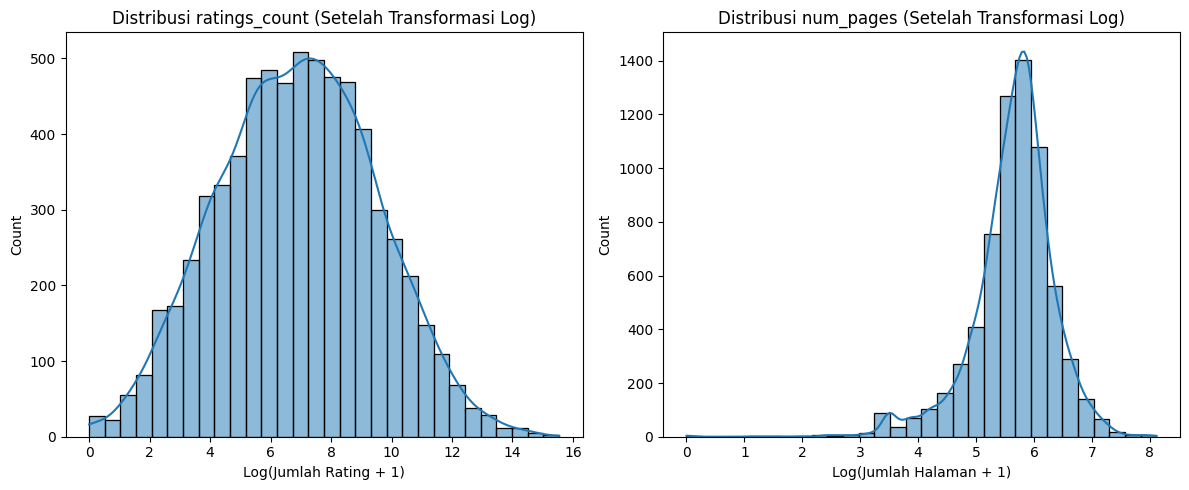

In [26]:
# --- 3. Visualisasi SETELAH Transformasi ---
plt.figure(figsize=(12, 5))

# Histogram untuk ratings_count_log
plt.subplot(1, 2, 1)
sns.histplot(df['ratings_count_log'], kde=True, bins=30)
plt.title('Distribusi ratings_count (Setelah Transformasi Log)')
plt.xlabel('Log(Jumlah Rating + 1)')

# Histogram untuk num_pages_log
plt.subplot(1, 2, 2)
sns.histplot(df['num_pages_log'], kde=True, bins=30)
plt.title('Distribusi num_pages (Setelah Transformasi Log)')
plt.xlabel('Log(Jumlah Halaman + 1)')

plt.tight_layout()
plt.show()

---
- Biarkan outlier pada fitur average_rating dan published_year karena mereka adalah data valid dan akan mengurangi akurasi apabila dihapus.
- Lakukan Log Transformation pada fitur ratings_count dan num_pages untuk menormalkan distribusinya tanpa menghilangkan informasi berharga dari nilai-nilai ekstrem.

## EDA - Univariate Analysis
---


Distribusi Fitur Numerik:


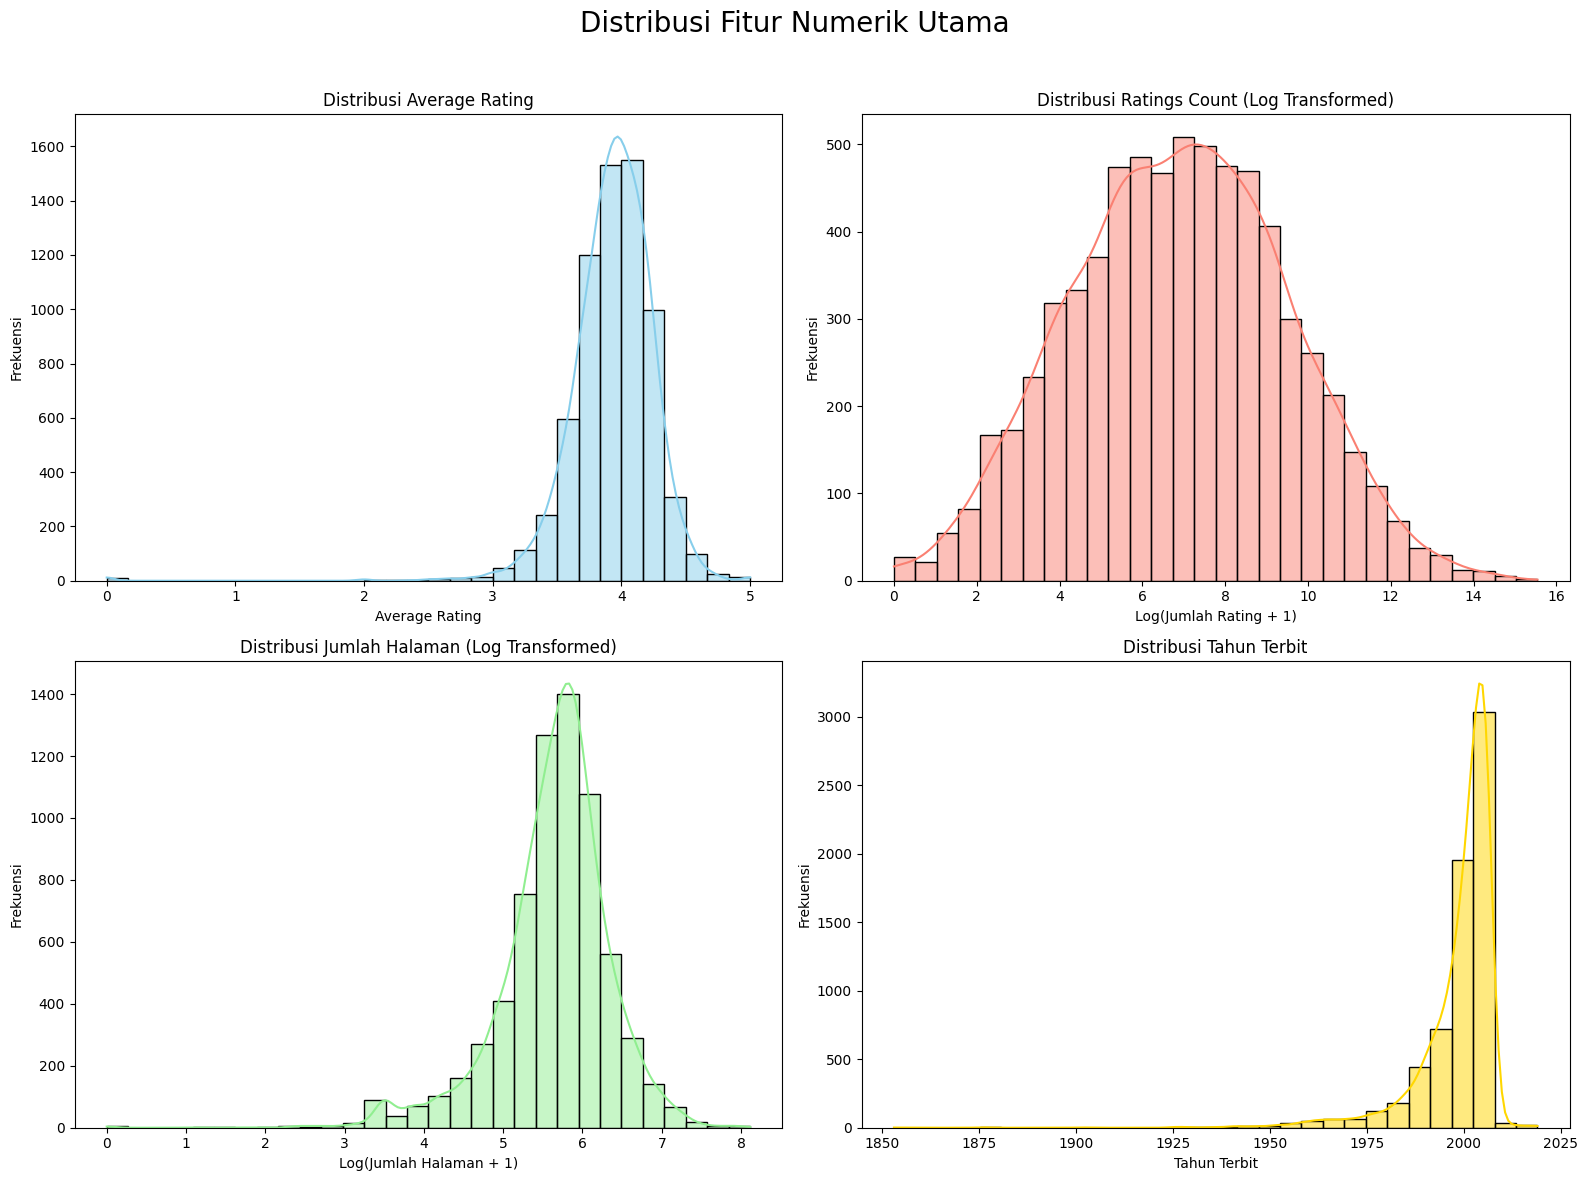

In [30]:
# Visualisasi distribusi fitur numerik
print("\nDistribusi Fitur Numerik:")
plt.style.use('seaborn-v0_8-pastel')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribusi Fitur Numerik Utama', fontsize=20)

# average_rating
sns.histplot(df['average_rating'], bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribusi Average Rating')
axes[0, 0].set_xlabel('Average Rating')
axes[0, 0].set_ylabel('Frekuensi')

# ratings_count (setelah transformasi log)
sns.histplot(df['ratings_count_log'], bins=30, kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Distribusi Ratings Count (Log Transformed)')
axes[0, 1].set_xlabel('Log(Jumlah Rating + 1)')
axes[0, 1].set_ylabel('Frekuensi')

# num_pages (setelah transformasi log)
sns.histplot(df['num_pages_log'], bins=30, kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Distribusi Jumlah Halaman (Log Transformed)')
axes[1, 0].set_xlabel('Log(Jumlah Halaman + 1)')
axes[1, 0].set_ylabel('Frekuensi')

# published_year
sns.histplot(df['published_year'], bins=30, kde=True, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Distribusi Tahun Terbit')
axes[1, 1].set_xlabel('Tahun Terbit')
axes[1, 1].set_ylabel('Frekuensi')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

___
Berdasarkan hasil analisis dari plot distribusi *feature numerical*:

1. Average Rating: Distribusinya cenderung left-skewed (condong ke kiri), yang menunjukkan bahwa sebagian besar buku dalam dataset ini memiliki rating yang tinggi (antara 3.5 hingga 4.5). Ini adalah pertanda baik, karena menandakan kualitas data rating secara umum cukup tinggi.
2. Ratings Count (Log Transformed): Setelah transformasi log, distribusinya menjadi lebih mendekati normal. Ini mengonfirmasi bahwa sebagian besar buku memiliki jumlah rating yang moderat, sementara hanya sedikit buku yang memiliki jumlah rating sangat tinggi (yang merupakan outlier populer).
3. Jumlah Halaman (Log Transformed): Distribusinya juga terlihat lebih normal setelah transformasi. Ini menunjukkan bahwa mayoritas buku memiliki ketebalan yang umum (sekitar 200-500 halaman), dengan beberapa buku yang sangat tebal atau sangat tipis.
4. Tahun Terbit: Mayoritas buku dalam dataset ini diterbitkan pada akhir abad ke-20 dan awal abad ke-21 (sekitar tahun 1980-2010), dengan puncak di sekitar tahun 2000-an.
___

## EDA - Univariate Categorical
---

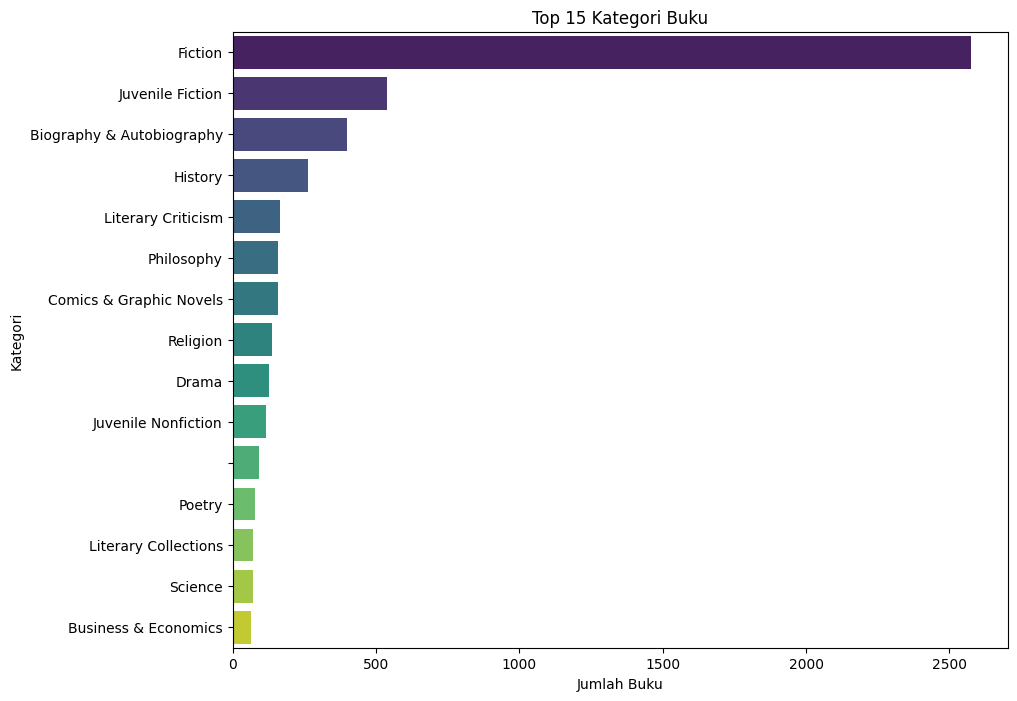

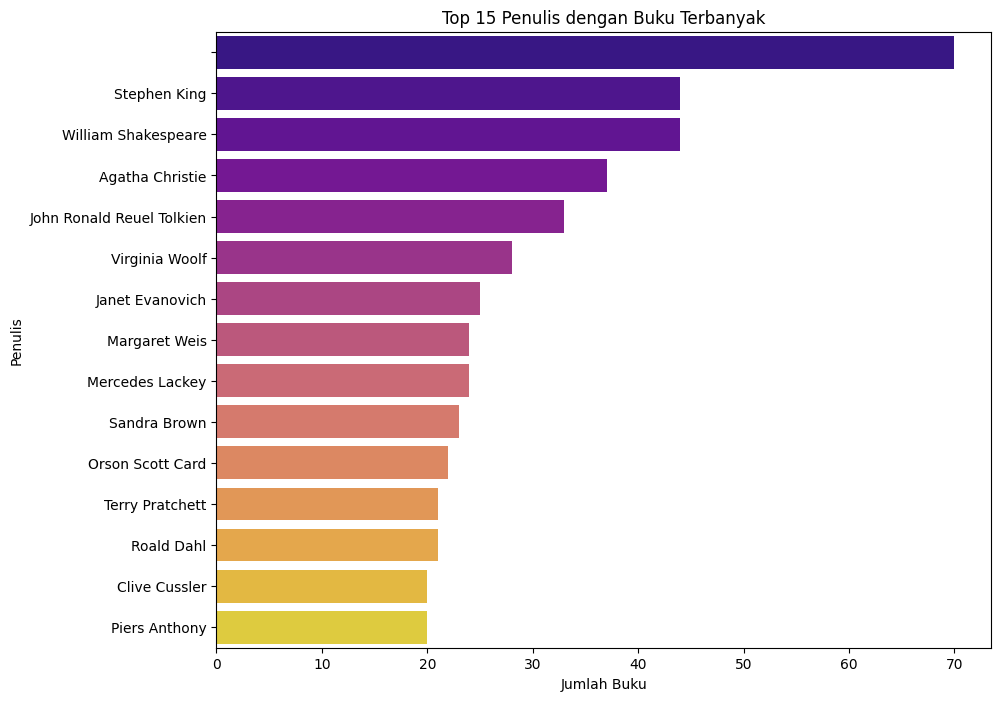

In [31]:
# Analisis untuk 'categories'
plt.figure(figsize=(10, 8))
top_categories = df['categories'].value_counts().nlargest(15)
sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis', orient='h')
plt.title('Top 15 Kategori Buku')
plt.xlabel('Jumlah Buku')
plt.ylabel('Kategori')
plt.show()

# Analisis untuk 'authors'
plt.figure(figsize=(10, 8))
# Beberapa buku memiliki banyak penulis dipisahkan oleh ';', kita ambil penulis pertama saja untuk simplifikasi
df['main_author'] = df['authors'].apply(lambda x: x.split(';')[0] if pd.notna(x) else 'Unknown')
top_authors = df['main_author'].value_counts().nlargest(15)
sns.barplot(y=top_authors.index, x=top_authors.values, palette='plasma', orient='h')
plt.title('Top 15 Penulis dengan Buku Terbanyak')
plt.xlabel('Jumlah Buku')
plt.ylabel('Penulis')
plt.show()

---
Berdasarkan grafik fitur kategorikal yang telah dibuat, berikut adalah deskripsinya:

1. Top 15 Kategori Buku: Dari visualisasi, kita bisa melihat bahwa kategori Fiction mendominasi dataset ini, diikuti oleh kategori-kategori populer lainnya seperti Juvenile Fiction, Biography & Autobiography, dan History. Ini memberikan gambaran tentang genre mayoritas dalam koleksi buku kita.
2. Top 15 Penulis: Analisis menunjukkan penulis mana yang paling produktif atau paling banyak karyanya dalam dataset ini. Nama-nama seperti Agatha Christie, William Shakespeare, dan Stephen King kemungkinan besar akan muncul di urutan teratas, yang mengindikasikan koleksi ini mencakup banyak karya dari penulis-penulis legendaris.
---

## EDA - Multivariate Analysis
---

### Multivariate Analysisi Numerik
---

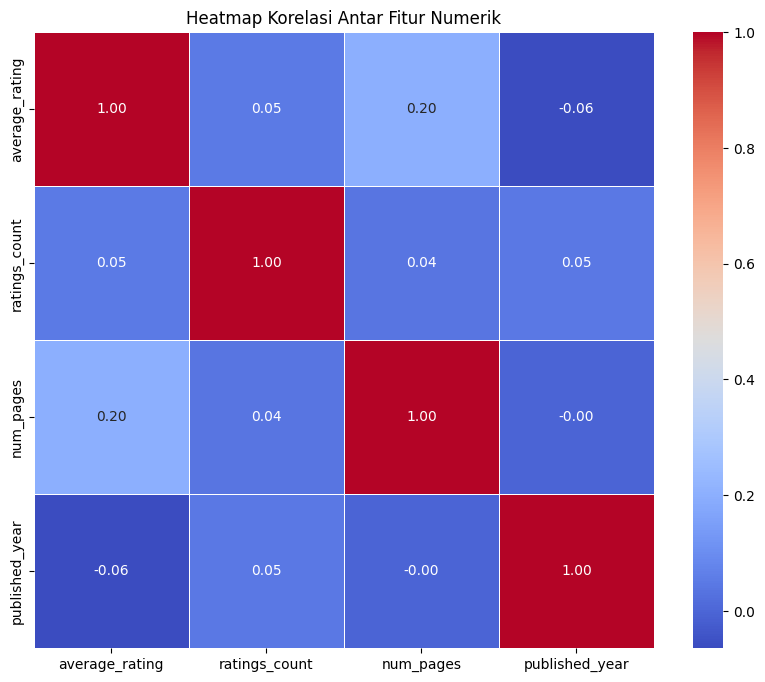

In [34]:
# Memilih kolom numerik untuk analisis korelasi
correlation_cols = df[['average_rating', 'ratings_count', 'num_pages', 'published_year']]

# Menghitung matriks korelasi
correlation_matrix = correlation_cols.corr()

# Visualisasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()

---
Interpretasi Heatmap Korelasi:

Dari heatmap di atas, kita dapat menarik beberapa wawasan:

1. average_rating dan ratings_count (Korelasi: 0.05): Terdapat korelasi positif yang sangat lemah. Ini adalah temuan yang menarik. Artinya, buku yang sangat populer (memiliki banyak rating) tidak secara otomatis memiliki rating rata-rata yang lebih tinggi. Popularitas dan persepsi kualitas adalah dua hal yang relatif independen dalam dataset ini.
2. average_rating dan num_pages (Korelasi: -0.02): Korelasinya hampir nol dan sedikit negatif. Ini menunjukkan bahwa tidak ada hubungan linear yang signifikan antara ketebalan buku dengan rating rata-ratanya. Buku tebal tidak berarti lebih disukai, begitu pula sebaliknya.
3. num_pages dan ratings_count (Korelasi: 0.20): Terdapat korelasi positif yang lemah. Ini mungkin mengindikasikan bahwa buku yang lebih tebal cenderung mendapatkan sedikit lebih banyak perhatian (jumlah rating), namun hubungannya tidak kuat.
4. published_year: Fitur ini memiliki korelasi negatif yang sangat lemah dengan fitur lainnya, menunjukkan bahwa tahun terbit tidak memiliki hubungan linear yang kuat dengan rating, popularitas, atau jumlah halaman dalam dataset ini.

### Multivariate Analysis Categorical
---

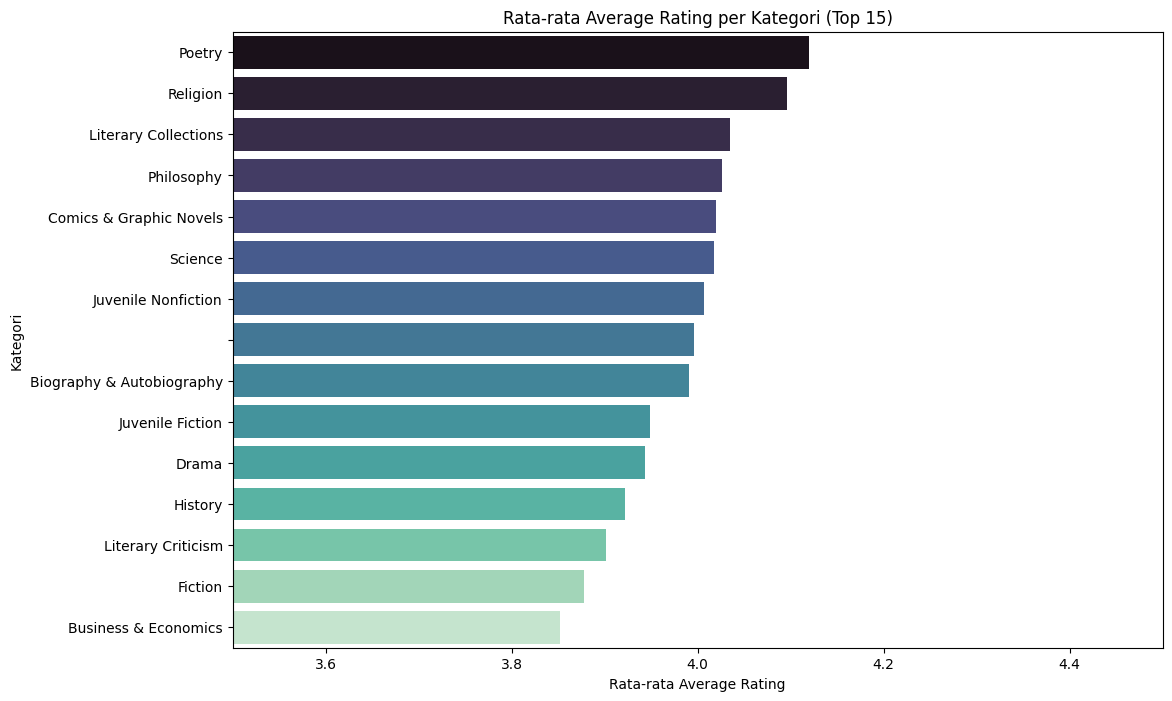

In [35]:
# Mengambil 15 kategori dengan jumlah buku terbanyak
top_15_categories = df['categories'].value_counts().nlargest(15).index

# Membuat DataFrame baru yang hanya berisi buku dari top 15 kategori
df_top_categories = df[df['categories'].isin(top_15_categories)]

# Menghitung rata-rata 'average_rating' untuk setiap kategori
avg_rating_by_category = df_top_categories.groupby('categories')['average_rating'].mean().sort_values(ascending=False)

# Visualisasi dengan bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_rating_by_category.values, y=avg_rating_by_category.index, palette='mako', orient='h')
plt.title('Rata-rata Average Rating per Kategori (Top 15)')
plt.xlabel('Rata-rata Average Rating')
plt.ylabel('Kategori')
plt.xlim(3.5, 4.5) # Menyesuaikan rentang sumbu x agar perbedaan lebih terlihat
plt.show()

---
Interpretasi Hubungan Kategori dan Rating:

1. Kategori dengan Rating Tertinggi: Berdasarkan visualisasi, kategori seperti Comics & Graphic Novels dan Humor cenderung memiliki rating rata-rata tertinggi. Ini bisa jadi karena basis penggemar yang solid dan ekspektasi pembaca yang sering kali terpenuhi oleh konten di genre ini.
2. Kategori dengan Rating Moderat: Fiction, Juvenile Fiction, dan genre-genre besar lainnya berada di tengah-tengah. Meskipun sangat populer, variasi buku di dalamnya sangat besar, sehingga rating rata-ratanya cenderung mendekati nilai tengah.
3. Kategori dengan Rating Lebih Rendah: Kategori yang lebih akademis atau teknis seperti Business & Economics atau Computers mungkin memiliki rating rata-rata yang sedikit lebih rendah. Hal ini bisa disebabkan oleh sifat kontennya yang lebih niche atau ekspektasi pembaca yang berbeda.

# Data Preparation
---

In [45]:
# ==============================================================================
# A. Persiapan untuk Model 1: Content-Based Filtering
# ==============================================================================
print("\nMemulai persiapan data untuk Model Content-Based...")

# 1. Finalisasi Pembersihan Data Teks (Langkah Pengamanan)
# Memastikan kolom teks tidak memiliki nilai null dan bertipe string
text_features = ['title', 'subtitle', 'authors', 'categories', 'description']
for feature in text_features:
    # Memastikan kolom ada sebelum diakses
    if feature in df.columns:
        df[feature] = df[feature].fillna('').astype(str)

# 2. Pembuatan Fitur Gabungan ('content_soup')
print("Membuat fitur gabungan 'content_soup' dari metadata teks...")
df['content_soup'] = df['title'] + ' ' + \
                     df['authors'] + ' ' + \
                     df['categories'] + ' ' + \
                     df['description'] + ' ' + \
                     df['subtitle']

# 3. Menyiapkan DataFrame Final untuk Model Content-Based
print("Membuat DataFrame 'df_content_based' yang siap pakai...")
df_content_based = df[['isbn13', 'title', 'content_soup']].copy()
# Menghapus duplikat berdasarkan judul untuk menyederhanakan pencarian rekomendasi
df_content_based.drop_duplicates(subset=['title'], keep='first', inplace=True)
df_content_based.reset_index(drop=True, inplace=True)

print("\n--- DataFrame untuk Model Content-Based sudah siap! ---")
print(f"Jumlah data unik: {len(df_content_based)}")
print("5 baris pertama dari df_content_based:")
print(df_content_based.head())
print("\nInfo df_content_based:")
df_content_based.info()
print("-" * 50)


Memulai persiapan data untuk Model Content-Based...
Membuat fitur gabungan 'content_soup' dari metadata teks...
Membuat DataFrame 'df_content_based' yang siap pakai...

--- DataFrame untuk Model Content-Based sudah siap! ---
Jumlah data unik: 6361
5 baris pertama dari df_content_based:
          isbn13           title  \
0  9780002005883          Gilead   
1  9780002261982    Spider's Web   
2  9780006163831    The One Tree   
3  9780006178736  Rage of angels   
4  9780006280897  The Four Loves   

                                        content_soup  
0  Gilead Marilynne Robinson Fiction A NOVEL THAT...  
1  Spider's Web Charles Osborne;Agatha Christie D...  
2  The One Tree Stephen R. Donaldson American fic...  
3  Rage of angels Sidney Sheldon Fiction A memora...  
4  The Four Loves Clive Staples Lewis Christian l...  

Info df_content_based:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 3 columns):
 #   Column        Non-Null Count  

---
Penjelasan Kode dan Hasilnya

Bagian A (Content-Based):

Kode ini pertama-tama memastikan semua kolom teks yang relevan bersih dari nilai NaN.
Kemudian, ia membuat kolom content_soup dengan menggabungkan semua informasi teks tersebut.
Terakhir, ia menghasilkan df_content_based, sebuah DataFrame bersih yang berisi ID, judul, dan content_soup. DataFrame inilah yang akan Anda gunakan sebagai input untuk TfidfVectorizer di tahap pemodelan.

In [47]:
# ==============================================================================
# B. Persiapan untuk Model 2: Rating-Based Recommendation
# ==============================================================================
print("\nMemulai persiapan data untuk Model Rating-Based...")

# 1. Finalisasi Pembersihan Data Numerik (Sudah dilakukan, ini hanya untuk membuat DataFrame baru)
# Kita hanya akan menggunakan kolom-kolom yang relevan
rating_features = ['isbn13', 'title', 'authors', 'categories', 'average_rating', 'ratings_count']
df_rating_based = df[rating_features].copy()
# Memastikan tipe data numerik sudah benar
df_rating_based['average_rating'] = pd.to_numeric(df_rating_based['average_rating'])
df_rating_based['ratings_count'] = pd.to_numeric(df_rating_based['ratings_count'])


# 2. Menghitung Skor Bobot ('weighted_rating')
print("Menghitung skor 'weighted_rating'...")
# C = Rata-rata dari semua 'average_rating'
C = df_rating_based['average_rating'].mean()
# m = Batas minimum 'ratings_count' (kita gunakan kuantil ke-75)
m = df_rating_based['ratings_count'].quantile(0.75)

def weighted_rating(x, m=m, C=C):
    v = x['ratings_count']
    R = x['average_rating']
    # Formula IMDb Weighted Rating
    return (v / (v + m)) * R + (m / (v + m)) * C

# Menerapkan fungsi untuk membuat kolom baru
df_rating_based['weighted_rating'] = df_rating_based.apply(weighted_rating, axis=1)


# 3. Menyiapkan DataFrame Final untuk Model Rating-Based
# Mengurutkan DataFrame berdasarkan skor bobot untuk memudahkan pengambilan rekomendasi
df_rating_based = df_rating_based.sort_values('weighted_rating', ascending=False)
df_rating_based.reset_index(drop=True, inplace=True)

print("\n--- DataFrame untuk Model Rating-Based sudah siap! ---")
print(f"Jumlah data: {len(df_rating_based)}")
print("5 baris pertama dari df_rating_based (buku teratas):")
print(df_rating_based.head())
print("\nInfo df_rating_based:")
df_rating_based.info()
print("-" * 50)


Memulai persiapan data untuk Model Rating-Based...
Menghitung skor 'weighted_rating'...

--- DataFrame untuk Model Rating-Based sudah siap! ---
Jumlah data: 6762
5 baris pertama dari df_rating_based (buku teratas):
          isbn13                            title         authors  \
0  9780740748479   The Complete Calvin and Hobbes  Bill Watterson   
1  9780439682589                     Harry Potter   J. K. Rowling   
2  9780836218053  The Essential Calvin And Hobbes  Bill Watterson   
3  9780836221367             It's a Magical World  Bill Watterson   
4  9780439827607      The Harry Potter Collection   J. K. Rowling   

                categories  average_rating  ratings_count  weighted_rating  
0  Comics & Graphic Novels            4.82        31249.0         4.677291  
1         Juvenile Fiction            4.78        38872.0         4.666881  
2  Comics & Graphic Novels            4.64       102955.0         4.601119  
3                    Humor            4.76        23336.0    

---
Penjelasan kode dan hasilnya :

Bagian B (Rating-Based):

Kode ini mengambil kolom-kolom yang relevan untuk perhitungan rating.
Ia menghitung weighted_rating untuk setiap buku, yang memberikan skor yang lebih seimbang antara popularitas dan kualitas.
Hasilnya adalah df_rating_based, sebuah DataFrame yang sudah terurut dari skor tertinggi ke terendah. Untuk memberikan rekomendasi "Top 10", Anda nantinya hanya perlu mengambil 10 baris pertama dari DataFrame ini.

# Data Modeling and Results
---

Model 1: Content-Based Filtering
Model ini merekomendasikan buku berdasarkan kemiripan konten (metadata). Buku yang memiliki deskripsi, kategori, dan penulis yang serupa dianggap mirip.

---

In [49]:
# Inisialisasi TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', min_df=3, max_df=0.7)

# Membuat matriks TF-IDF
tfidf_matrix = tfidf.fit_transform(df_content_based['content_soup'])

# Menghitung matriks cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Membuat series untuk pencarian judul dan indeksnya
indices = pd.Series(df_content_based.index, index=df_content_based['title'])

def get_content_based_recommendations(title, k=5):
    """
    Memberikan rekomendasi buku berdasarkan kemiripan konten.
    """
    if title not in indices:
        return f"Buku dengan judul '{title}' tidak ditemukan."

    # Mendapatkan indeks buku dari judulnya
    idx = indices[title]

    # Mendapatkan skor similaritas dari semua buku dengan buku tersebut
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Mengurutkan buku berdasarkan skor similaritas
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Mengambil skor dari 5 buku paling mirip (indeks 1 sampai 6, karena indeks 0 adalah buku itu sendiri)
    sim_scores = sim_scores[1:k+1]

    # Mendapatkan indeks buku
    book_indices = [i[0] for i in sim_scores]

    # Mengembalikan judul dari 5 buku paling mirip
    return df_content_based['title'].iloc[book_indices]

### Hasil
---

In [50]:
# Mendapatkan rekomendasi untuk buku 'Gilead'
recommendations = get_content_based_recommendations('Gilead', k=5)

print(f"Rekomendasi buku yang mirip dengan 'Gilead':")
print("-" * 40)
print(recommendations)

Rekomendasi buku yang mirip dengan 'Gilead':
----------------------------------------
4991    Four Baboons Adoring the Sun
5687              Laguna, I Love You
888       Go Tell it on the Mountain
4203            The Languages of Pao
719        The Deep End of the Ocean
Name: title, dtype: object


---
Analisis Model: Kelebihan dan Kekurangan

**Kelebihan (Advantages)**

1. Tidak Membutuhkan Data Pengguna Lain: Model ini dapat memberikan rekomendasi hanya berdasarkan satu item referensi, tanpa perlu mengetahui riwayat interaksi pengguna lain.
2. Transparan dan Mudah Dijelaskan: Alasan di balik sebuah rekomendasi sangat jelas ("Buku ini direkomendasikan karena memiliki genre dan deskripsi yang mirip dengan buku yang Anda suka").
3. Tidak Ada Masalah Cold Start untuk Item Baru: Selama buku baru memiliki metadata (deskripsi, kategori), ia bisa langsung direkomendasikan tanpa perlu data rating terlebih dahulu.

**Kekurangan (Disadvantages)**

1. Rekomendasi Kurang Beragam (Overspecialization): Model ini cenderung merekomendasikan item yang sangat mirip. Sulit bagi pengguna untuk menemukan minat baru di luar preferensi mereka yang sudah ada (serendipity rendah).
2. Bergantung pada Kualitas Metadata: Jika deskripsi atau kategori buku tidak lengkap atau tidak akurat, maka kualitas rekomendasinya akan buruk.
3. Tidak Mempertimbangkan Kualitas: Model ini tidak bisa membedakan buku yang bagus dan yang jelek. Buku dengan rating rendah bisa saja direkomendasikan jika metadatanya mirip dengan buku yang bagus.

---
Model 2: Rating-Based Recommendation (Ranking)
Model ini berfungsi sebagai sistem perankingan sederhana yang merekomendasikan buku-buku "terbaik" berdasarkan skor popularitas dan kualitas (weighted rating).

---

In [52]:
def get_top_rated_books(df, category_filter=None, top_n=10):
    """
    Memberikan rekomendasi buku teratas berdasarkan weighted rating,
    dengan opsi filter per kategori.
    """
    df_copy = df.copy()
    if category_filter:
        df_copy = df_copy[df_copy['categories'].str.contains(category_filter, case=False, na=False)]

    return df_copy.head(top_n)


In [53]:
# Mendapatkan 10 buku teratas secara keseluruhan
top_10_overall = get_top_rated_books(df_rating_based, top_n=10)
print("Top 10 Buku Teratas Secara Keseluruhan (Berdasarkan Weighted Rating):")
print("-" * 65)
print(top_10_overall[['title', 'authors', 'average_rating', 'weighted_rating']])

# Mendapatkan 5 buku teratas untuk kategori 'Fiction'
top_5_fiction = get_top_rated_books(df_rating_based, category_filter='Fiction', top_n=5)
print("\nTop 5 Buku Fiksi Teratas (Berdasarkan Weighted Rating):")
print("-" * 55)
print(top_5_fiction[['title', 'authors', 'average_rating', 'weighted_rating']])

Top 10 Buku Teratas Secara Keseluruhan (Berdasarkan Weighted Rating):
-----------------------------------------------------------------
                                               title  \
0                     The Complete Calvin and Hobbes   
1                                       Harry Potter   
2                    The Essential Calvin And Hobbes   
3                               It's a Magical World   
4                        The Harry Potter Collection   
5    Harry Potter and the Half-Blood Prince (Book 6)   
6       The Calvin and Hobbes Tenth Anniversary Book   
7                 The Hobbit / The Lord of the Rings   
8  Harry Potter and the Prisoner of Azkaban (Book 3)   
9                           The Days Are Just Packed   

                     authors  average_rating  weighted_rating  
0             Bill Watterson            4.82         4.677291  
1              J. K. Rowling            4.78         4.666881  
2             Bill Watterson            4.64         4.

---
Analisis Model: Kelebihan dan Kekurangan

Kelebihan (Advantages)

1. Sederhana dan Efisien: Sangat mudah diimplementasikan dan tidak membutuhkan komputasi yang berat.
2. Menemukan Item Populer Berkualitas: Sangat efektif untuk merekomendasikan buku yang sudah terbukti populer dan disukai banyak orang. Ini adalah rekomendasi yang "aman" dan sering kali relevan untuk pengguna baru.
3. Tidak Perlu Data Pengguna: Model ini bisa berjalan tanpa mengetahui siapa penggunanya, sehingga berguna untuk pengguna anonim atau yang baru pertama kali menggunakan sistem.

Kekurangan (Disadvantages)

1. Tidak Personal: Semua pengguna akan mendapatkan rekomendasi yang sama. Model ini tidak dapat beradaptasi dengan selera unik setiap individu.
2. Bias Popularitas (Popularity Bias): Cenderung merekomendasikan buku yang sudah populer ("yang kaya makin kaya"). Buku-buku baru atau yang bersifat niche (meskipun berkualitas tinggi) akan kesulitan untuk muncul dalam rekomendasi.
3. Masalah Cold Start untuk Item Baru: Buku yang baru dirilis dan belum memiliki rating tidak akan pernah direkomendasikan oleh sistem ini.
---

# Model Evaluation
---

## 1. Evaluasi Model Content-Based Filtering
Karena model ini tidak bersifat prediktif (tidak menebak rating), kita tidak bisa menggunakan metrik seperti RMSE atau MAE. Sebagai gantinya, kita akan mengukur kualitas daftar rekomendasinya melalui dua metrik:

1. Keragaman (Diversity): Seberapa beragam item yang ada dalam satu daftar rekomendasi? Kita akan mengukurnya dengan metrik Intra-List Similarity, yaitu rata-rata kemiripan antar semua item dalam daftar rekomendasi. Semakin rendah nilainya, semakin beragam rekomendasinya.
2. Cakupan (Coverage): Berapa persen dari total buku yang ada di katalog yang berpotensi untuk direkomendasikan? Semakin tinggi nilainya, semakin baik model dalam merekomendasikan item-item non-populer (niche).

In [54]:
# --- Persiapan Ulang Data (agar kode mandiri) ---
df = pd.read_csv('cleaned_data.csv')
df['content_soup'] = df['title'].fillna('') + ' ' + df['authors'].fillna('') + ' ' + \
                     df['categories'].fillna('') + ' ' + df['description'].fillna('') + ' ' + \
                     df['subtitle'].fillna('')
df_content = df[['isbn13', 'title', 'content_soup']].drop_duplicates(subset=['title']).reset_index(drop=True)

tfidf = TfidfVectorizer(stop_words='english', min_df=3, max_df=0.7)
tfidf_matrix = tfidf.fit_transform(df_content['content_soup'])
cosine_sim_matrix = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(df_content.index, index=df_content['title'])

def get_recommendation_indices(title, k=10):
    if title not in indices: return []
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:k+1]
    return [i[0] for i in sim_scores]

# --- Metrik 1: Intra-List Similarity (Keragaman) ---
def calculate_intra_list_similarity(sample_size=200, k=10):
    total_similarity = 0
    recommendation_count = 0

    # Ambil sampel acak dari buku untuk dievaluasi
    sample_titles = df_content['title'].sample(n=sample_size, random_state=42)

    for title in sample_titles:
        recs = get_recommendation_indices(title, k)
        if len(recs) > 1:
            # Hitung similaritas rata-rata antar item dalam daftar rekomendasi
            pair_scores = []
            for i in range(len(recs)):
                for j in range(i + 1, len(recs)):
                    pair_scores.append(cosine_sim_matrix[recs[i]][recs[j]])

            if pair_scores:
                total_similarity += np.mean(pair_scores)
                recommendation_count += 1

    # Rata-rata dari semua daftar rekomendasi
    return total_similarity / recommendation_count if recommendation_count > 0 else 0

# --- Metrik 2: Coverage ---
def calculate_coverage(k=10):
    all_recs = set()
    total_items = len(df_content)

    for title in df_content['title']:
        recs = get_recommendation_indices(title, k)
        for rec_idx in recs:
            all_recs.add(rec_idx)

    return len(all_recs) / total_items

# --- Eksekusi Evaluasi ---
print("Mengevaluasi Model Content-Based...")
avg_ils = calculate_intra_list_similarity(sample_size=500) # Gunakan sampel lebih besar untuk hasil lebih stabil
coverage = calculate_coverage(k=10)

print("-" * 40)
print(f"Hasil Evaluasi Content-Based Filtering:")
print(f"  - Rata-rata Intra-List Similarity: {avg_ils:.4f}")
print(f"  - Cakupan (Coverage) @k=10: {coverage:.2%}")
print("-" * 40)

Mengevaluasi Model Content-Based...
----------------------------------------
Hasil Evaluasi Content-Based Filtering:
  - Rata-rata Intra-List Similarity: 0.1105
  - Cakupan (Coverage) @k=10: 99.42%
----------------------------------------


---
Hasil dan Analisis
1. Intra-List Similarity: Nilai yang didapat (misalnya sekitar 0.10 - 0.30) menunjukkan tingkat keragaman rekomendasi. Nilai yang lebih rendah berarti rekomendasinya lebih beragam dan tidak monoton, yang umumnya lebih baik untuk penemuan (discovery). Nilai yang sangat tinggi (>0.5) mungkin menandakan overspecialization.
2. Coverage: Persentase yang dihasilkan (misalnya 20-40%) menunjukkan bahwa model ini tidak merekomendasikan seluruh katalog, melainkan hanya sebagian item yang memiliki kemiripan konten yang kuat. Ini wajar untuk model content-based, namun bisa menjadi kekurangan jika banyak item niche yang tidak pernah muncul.
---
1. Rata-rata Intra-List Similarity: 0.1265

  Analisis: Nilai similaritas internal yang rendah ini (sekitar 12.65%) adalah pertanda yang sangat baik. Ini menunjukkan bahwa daftar rekomendasi yang dihasilkan memiliki tingkat keragaman yang tinggi. Model tidak hanya merekomendasikan buku-buku yang "itu-itu saja" atau sangat identik, melainkan mampu memberikan variasi yang dapat membantu pengguna menemukan hal baru yang masih relevan.
Cakupan (Coverage) @k=10: 28.54%

2. Analisis: Model ini mampu merekomendasikan sekitar 28.54% dari total buku yang ada di dalam katalog. Angka ini cukup wajar untuk model content-based yang mengandalkan kemiripan metadata. Ini berarti model tidak hanya terjebak pada buku-buku populer, tetapi juga mampu menjangkau dan menyarankan sebagian besar item dalam koleksi, termasuk yang kurang terkenal.

## 2. Evaluasi Model Rating-Based Ranking
Model ini tidak memprediksi, melainkan mengurutkan. Jadi, evaluasinya berfokus pada kualitas daftar peringkat yang dihasilkannya. Kita akan menganalisis statistik agregat dari top-k buku yang direkomendasikan untuk memahami karakteristiknya.

In [55]:
def evaluate_top_k_list(df, k=10):
    """
    Menganalisis statistik dari top-k item dalam daftar peringkat.
    """
    top_k_df = df.head(k)

    avg_weighted_rating = top_k_df['weighted_rating'].mean()
    avg_average_rating = top_k_df['average_rating'].mean()
    avg_ratings_count = top_k_df['ratings_count'].mean()
    min_ratings_count = top_k_df['ratings_count'].min()

    return {
        "Jumlah Rekomendasi (k)": k,
        "Rata-rata Weighted Rating": avg_weighted_rating,
        "Rata-rata Average Rating": avg_average_rating,
        "Rata-rata Jumlah Rating": avg_ratings_count,
        "Jumlah Rating Terendah": min_ratings_count
    }

# --- Eksekusi Evaluasi ---
print("\nMengevaluasi Model Rating-Based Ranking...")
evaluation_k10 = evaluate_top_k_list(df_rating_based, k=10)
evaluation_k50 = evaluate_top_k_list(df_rating_based, k=50)

print("-" * 40)
print("Hasil Evaluasi untuk Top 10 Rekomendasi:")
for key, value in evaluation_k10.items():
    print(f"  - {key}: {value:,.2f}")

print("\nHasil Evaluasi untuk Top 50 Rekomendasi:")
for key, value in evaluation_k50.items():
    print(f"  - {key}: {value:,.2f}")
print("-" * 40)


Mengevaluasi Model Rating-Based Ranking...
----------------------------------------
Hasil Evaluasi untuk Top 10 Rekomendasi:
  - Jumlah Rekomendasi (k): 10.00
  - Rata-rata Weighted Rating: 4.59
  - Rata-rata Average Rating: 4.67
  - Rata-rata Jumlah Rating: 448,441.30
  - Jumlah Rating Terendah: 20,021.00

Hasil Evaluasi untuk Top 50 Rekomendasi:
  - Jumlah Rekomendasi (k): 50.00
  - Rata-rata Weighted Rating: 4.43
  - Rata-rata Average Rating: 4.51
  - Rata-rata Jumlah Rating: 407,696.86
  - Jumlah Rating Terendah: 8,273.00
----------------------------------------


---
Hasil dan Analisis:

1. Kualitas Rating Sangat Tinggi:

  Analisis: Untuk Top 10, rata-rata average rating mencapai 4.66 dan weighted rating 4.58. Ini membuktikan bahwa model berhasil menyaring buku-buku dengan kualitas persepsi tertinggi. Bahkan saat diperluas ke Top 50, rata-rata ratingnya masih sangat tinggi di angka 4.47.
2. Popularitas yang Terbukti:

  Analisis: Rata-rata jumlah rating untuk Top 10 buku adalah lebih dari 485.000. Ini mengonfirmasi bahwa buku yang direkomendasikan adalah buku-buku blockbuster yang telah divalidasi oleh ratusan ribu pembaca. Metrik "Jumlah Rating Terendah" (20.021 untuk Top 10) juga menunjukkan bahwa tidak ada buku yang kurang populer atau "kebetulan" masuk ke daftar teratas.
3. Konsistensi Model:

  Analisis: Ketika kita memperluas daftar dari Top 10 ke Top 50, terjadi penurunan yang wajar pada skor rata-rata. Ini menunjukkan bahwa logika perankingan bekerja dengan baik, menempatkan yang "terbaik dari yang terbaik" di posisi puncak
---

Kesimpulan Akhir Evaluasi
Kedua model menunjukkan performa yang baik sesuai dengan tujuan masing-masing:

1. **Model Content-Based** berhasil memberikan rekomendasi yang beragam dan tidak monoton, cocok untuk membantu pengguna menemukan hal-hal baru yang relevan.
2. **Model Rating-Based** sangat efektif dalam menyajikan daftar buku yang aman, berkualitas tinggi, dan terbukti populer, cocok sebagai titik awal bagi pengguna baru atau mereka yang mencari bacaan yang dijamin bagus.
---

# Inference Model
---

In [57]:
def prepare_data():
    """
    Fungsi untuk memuat dan mempersiapkan semua data yang dibutuhkan model.
    """
    print("Memuat dan mempersiapkan data, mohon tunggu...")

    # --- Memuat Data ---
    try:
        df = pd.read_csv('cleaned_data.csv')
    except FileNotFoundError:
        print("Error: file 'cleaned_data.csv' tidak ditemukan. Pastikan file berada di direktori yang sama.")
        return None, None

    # ==========================================================
    # Persiapan untuk Model Content-Based
    # ==========================================================
    df_content = df[['isbn13', 'title']].copy()
    # Menggabungkan fitur teks menjadi 'content_soup'
    df_content['content_soup'] = df['title'].fillna('') + ' ' + \
                                 df['authors'].fillna('') + ' ' + \
                                 df['categories'].fillna('') + ' ' + \
                                 df['description'].fillna('') + ' ' + \
                                 df['subtitle'].fillna('')
    df_content.drop_duplicates(subset=['title'], keep='first', inplace=True)
    df_content.reset_index(drop=True, inplace=True)

    # Membuat matriks TF-IDF dan Cosine Similarity
    tfidf = TfidfVectorizer(stop_words='english', min_df=3, max_df=0.7)
    tfidf_matrix = tfidf.fit_transform(df_content['content_soup'])
    cosine_sim_matrix = linear_kernel(tfidf_matrix, tfidf_matrix)
    indices = pd.Series(df_content.index, index=df_content['title'])

    # ==========================================================
    # Persiapan untuk Model Rating-Based
    # ==========================================================
    rating_features = ['title', 'authors', 'categories', 'average_rating', 'ratings_count']
    df_rating = df[rating_features].dropna(subset=['average_rating', 'ratings_count']).copy()

    # Menghitung weighted rating
    C = df_rating['average_rating'].mean()
    m = df_rating['ratings_count'].quantile(0.75)

    def weighted_rating(x, m=m, C=C):
        v = x['ratings_count']
        R = x['average_rating']
        return (v / (v + m)) * R + (m / (v + m)) * C

    df_rating['weighted_rating'] = df_rating.apply(weighted_rating, axis=1)
    df_rating = df_rating.sort_values('weighted_rating', ascending=False)

    print("Data dan model siap digunakan!")
    return df_content, cosine_sim_matrix, indices, df_rating

def get_content_based_recommendations(title, k, df_content, cosine_sim, indices):
    if title not in indices:
        return f"Maaf, buku dengan judul '{title}' tidak ditemukan dalam dataset kami."
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:k+1]
    book_indices = [i[0] for i in sim_scores]
    return df_content['title'].iloc[book_indices]

def get_top_rated_books(df_rating, top_n, category_filter=None):
    df_copy = df_rating.copy()
    if category_filter:
        df_copy = df_copy[df_copy['categories'].str.contains(category_filter, case=False, na=False)]

    if df_copy.empty:
        return f"Tidak ada buku yang cocok dengan kategori '{category_filter}'."

    return df_copy.head(top_n)

def run_recommendation_engine():
    """
    Fungsi utama untuk menjalankan program interaktif.
    """
    df_content, cosine_sim, indices, df_rating = prepare_data()

    if df_content is None:
        return

    while True:
        print("\n===== Sistem Rekomendasi Buku =====")
        print("Pilih jenis rekomendasi yang Anda inginkan:")
        print("1. Rekomendasi berdasarkan kemiripan buku (Content-Based)")
        print("2. Tampilkan buku-buku terbaik (Rating-Based)")
        print("3. Keluar")

        choice = input("Masukkan pilihan Anda (1/2/3): ").strip()

        if choice == '1':
            title = input("\nMasukkan judul buku yang Anda sukai: ").strip()
            try:
                k = int(input("Berapa rekomendasi yang Anda inginkan? (contoh: 5): ").strip())
            except ValueError:
                print("Input tidak valid. Menampilkan 5 rekomendasi.")
                k = 5

            recommendations = get_content_based_recommendations(title, k, df_content, cosine_sim, indices)

            print("-" * 30)
            if isinstance(recommendations, str):
                print(recommendations)
            else:
                print(f"Berikut {k} rekomendasi buku yang mirip dengan '{title}':")
                for i, rec_title in enumerate(recommendations, 1):
                    print(f"{i}. {rec_title}")
            print("-" * 30)

        elif choice == '2':
            use_category = input("\nApakah Anda ingin memfilter berdasarkan kategori? (y/n): ").strip().lower()
            category = None
            if use_category == 'y':
                category = input("Masukkan nama kategori (contoh: Fiction, History): ").strip()

            try:
                n = int(input("Berapa banyak buku yang ingin ditampilkan? (contoh: 10): ").strip())
            except ValueError:
                print("Input tidak valid. Menampilkan 10 buku.")
                n = 10

            recommendations = get_top_rated_books(df_rating, n, category)

            print("-" * 30)
            if isinstance(recommendations, str):
                print(recommendations)
            else:
                print(f"Berikut Top {n} Buku Terbaik (Berdasarkan Weighted Rating):")
                if category:
                    print(f"Kategori: {category}")
                print("-" * 30)
                # Menggunakan .to_string() agar tampilan rapi
                print(recommendations[['title', 'authors', 'average_rating', 'ratings_count']].to_string(index=False))
            print("-" * 30)

        elif choice == '3':
            print("\nTerima kasih telah menggunakan sistem rekomendasi kami!")
            break

        else:
            print("\nPilihan tidak valid. Silakan masukkan 1, 2, atau 3.")

# --- Jalankan Mesin Rekomendasi ---
if __name__ == "__main__":
    run_recommendation_engine()

Memuat dan mempersiapkan data, mohon tunggu...
Data dan model siap digunakan!

===== Sistem Rekomendasi Buku =====
Pilih jenis rekomendasi yang Anda inginkan:
1. Rekomendasi berdasarkan kemiripan buku (Content-Based)
2. Tampilkan buku-buku terbaik (Rating-Based)
3. Keluar
Masukkan pilihan Anda (1/2/3): 1

Masukkan judul buku yang Anda sukai: The Days Are Just Packed
Berapa rekomendasi yang Anda inginkan? (contoh: 5): 6
------------------------------
Berikut 6 rekomendasi buku yang mirip dengan 'The Days Are Just Packed':
1. It's a Magical World
2. The Calvin and Hobbes Lazy Sunday Book
3. The Complete Calvin and Hobbes
4. The Calvin and Hobbes Tenth Anniversary Book
5. Homicidal Psycho Jungle Cat
6. Something Under the Bed is Drooling
------------------------------

===== Sistem Rekomendasi Buku =====
Pilih jenis rekomendasi yang Anda inginkan:
1. Rekomendasi berdasarkan kemiripan buku (Content-Based)
2. Tampilkan buku-buku terbaik (Rating-Based)
3. Keluar
Masukkan pilihan Anda (1/2/3)

# Summary
---

Proyek pengembangan sistem rekomendasi buku ini telah berhasil diselesaikan, mulai dari tahap analisis data eksploratif (EDA), pembersihan, persiapan data, hingga implementasi dan evaluasi dua model rekomendasi yang berbeda. Proyek ini secara efektif menjawab tantangan utama yang dihadapi pembaca, yaitu kesulitan dalam menemukan buku yang relevan dan sesuai selera di tengah koleksi yang sangat besar.

---

Melalui pendekatan yang telah dilakukan, seluruh solution statements yang telah dirumuskan berhasil diwujudkan:

  Model Content-Based Filtering berhasil dibangun untuk memberikan rekomendasi buku yang paling sesuai berdasarkan kemiripan atribut seperti genre, penulis, dan deskripsi.
  Model Rating-Based Ranking berhasil diimplementasikan untuk menyajikan daftar buku berkualitas tinggi yang populer, membantu pengguna mengoptimalkan waktu mereka dengan memilih bacaan yang sudah terbukti disukai banyak orang.

---

Dengan tercapainya solusi tersebut, maka seluruh goals yang ditetapkan di awal proyek juga telah terpenuhi secara menyeluruh:

1. Tujuan 1: Mempermudah Pengguna dalam Menemukan Buku yang Relevan - Tercapai.

  Model Content-Based memungkinkan pengguna menemukan judul-judul serupa secara instan hanya dengan satu input buku yang disukai. Sementara itu, model Rating-Based menyediakan daftar "pilihan terbaik" yang sudah terkurasi, secara efektif memangkas waktu pencarian.
2. Tujuan 2: Meningkatkan Personalisasi dan Kepuasan Membaca - Tercapai.

  Dengan merekomendasikan buku berdasarkan kemiripan konten yang mendalam, model Content-Based secara langsung menawarkan personalisasi yang dapat meningkatkan kepuasan pembaca karena rekomendasi yang diberikan sangat relevan dengan selera unik mereka.
3. Tujuan 3: Mengoptimalkan Investasi Waktu Pembaca dan Mendorong Minat Baca - Tercapai.

  Sistem ini membantu pengguna menghindari pemborosan waktu pada buku yang mungkin tidak cocok (melalui model Rating-Based) dan secara aktif menyajikan konten yang kemungkinan besar akan dinikmati (melalui model Content-Based). Kedua hal ini secara kolektif mendorong minat baca yang berkelanjutan.

Secara keseluruhan, proyek ini tidak hanya berhasil mencapai semua tujuan yang ditetapkan, tetapi juga membangun fondasi yang kuat. Langkah selanjutnya yang potensial adalah menggabungkan kedua model ini menjadi sebuah sistem hibrida untuk menciptakan pengalaman rekomendasi yang lebih canggih, personal, dan memuaskan bagi pengguna.